<a href="https://colab.research.google.com/github/williamG7/Clasificacion-de-imagenes/blob/main/Clasificaci%C3%B3n_de_imagenes_GuzmanWilliam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de imágenes con TensorFlow

Dataset [**CIFAR10**](https://keras.io/api/datasets/cifar10/?ref=hackernoon.com)
> mas info [aqui](https://www.cs.toronto.edu/~kriz/cifar.html)

### Carga del Conjunto de Datos CIFAR-10

Para este análisis, utilizaremos el dataset **CIFAR-10**, un estándar en el entrenamiento de modelos de visión artificial que contiene imágenes de **10 tipos de objetos y animales diferentes**.

Este conjunto de datos se compone de:
* **50.000 imágenes de entrenamiento** en color con una resolución de 32x32 píxeles.
* **10.000 imágenes de prueba**, lo que nos permite validar la precisión de nuestro modelo de clasificación.



#### Diccionario de Categorías
Las imágenes están etiquetadas en las siguientes **10 categorías** fundamentales:

| Etiqueta (Label) | Descripción |
| :--- | :--- |
| 0 | airplane (avión) |
| 1 | automobile (automóvil) |
| 2 | bird (pájaro) |
| 3 | cat (gato) |
| 4 | deer (ciervo) |
| 5 | dog (perro) |
| 6 | frog (rana) |
| 7 | horse (caballo) |
| 8 | ship (barco) |
| 9 | truck (camión) |

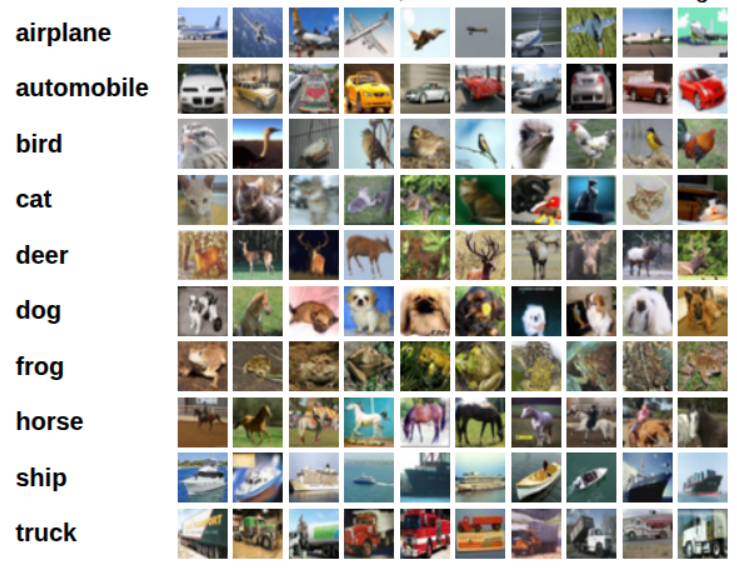

## Importar librerías

In [18]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## Importar dataset

In [19]:
imatges = keras.datasets.cifar10
(imatges_entrenament, etiquetes_entrenament), (imatges_test, etiquetes_test) = imatges.load_data()

---

### Desarrollo de la Red Neuronal Convolucional (CNN)

Utilizando el dataset de imágenes **CIFAR-10** de Keras, el objetivo es diseñar, implementar y entrenar una **red neuronal de convolución** (CNN) de alto rendimiento.

El modelo deberá ser capaz de procesar las características visuales de las imágenes (como bordes, texturas y formas) para clasificar automáticamente cada entrada en una de las 10 categorías predefinidas.



#### Etapas del Proceso:
* **Arquitectura de la Red**: Definición de capas convolucionales para la extracción de características.
* **Entrenamiento**: Ajuste de los pesos del modelo mediante los datos de entrenamiento.
* **Evaluación**: Validación de la capacidad de reconocimiento del modelo frente a nuevas imágenes.

## EDA

### Comprobamos cuántas filas y columnas tiene nuestro dataset original.

In [20]:
imatges_entrenament.shape

(50000, 32, 32, 3)

### subconjunto de datos del dataset correspondiente al grupo de test

In [21]:
imatges_test.shape

(10000, 32, 32, 3)

### comprobar que el dataset contiene las correspondientes categorías para cada imagen.


In [22]:
len(etiquetes_entrenament)

50000

### Verificacion de las dimensiones del Test

In [23]:
len(etiquetes_test)

10000

## Definir las categorias

In [24]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("Clases definidas:", class_name)

Clases definidas: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### Visualización de una imagen individual

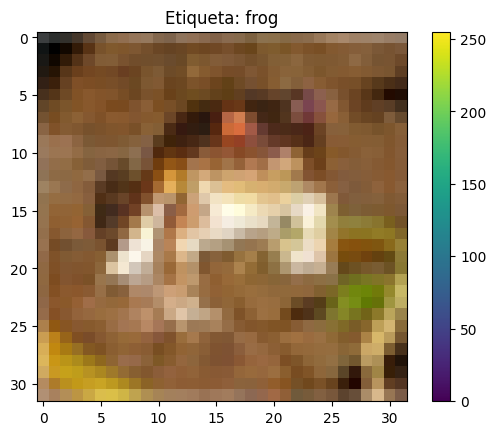

In [25]:
plt.figure()
plt.imshow(imatges_entrenament[0]) # Mostramos la primera imagen
plt.colorbar() # Muestra la escala de intensidad de los píxeles
plt.grid(False)
plt.title(f"Etiqueta: {class_name[etiquetes_entrenament[0][0]]}")
plt.show()

## Preprocesamos los datos

In [26]:
# escalar los valores de los pixeles al rango 0-1
imatges_entrenament = imatges_entrenament  /255.0
imatges_test = imatges_test /255.0

# verificar los datos
# Imprimimos el primer píxel de la primera imagen para ver que ahora es decimal
print("valor del primer pixel normalizado", imatges_entrenament[0, 0, 0])

valor del primer pixel normalizado [0.23137255 0.24313725 0.24705882]


### Visualización de control

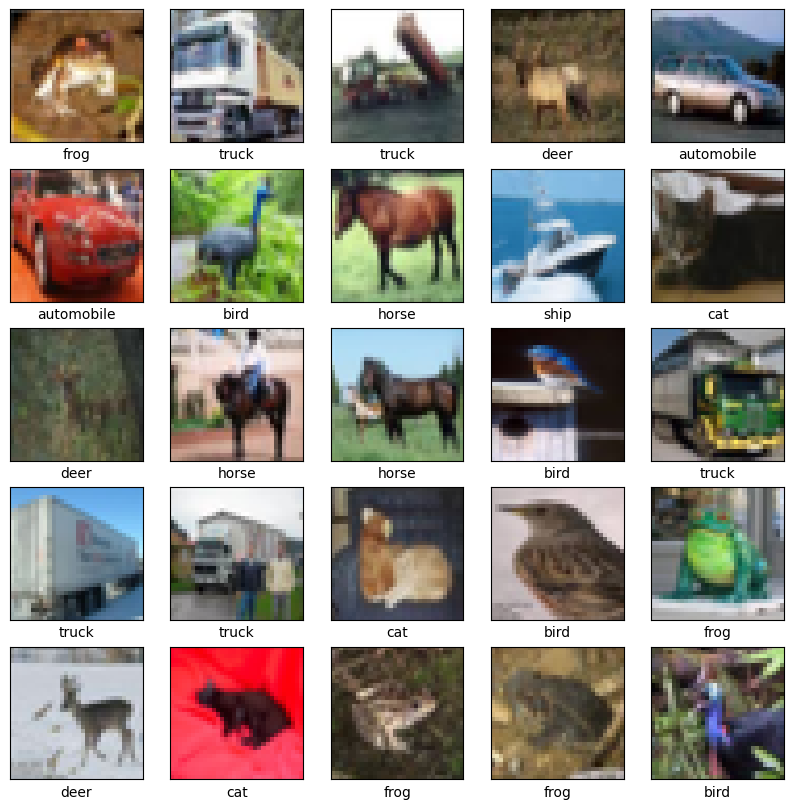

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imatges_entrenament[i])
  plt.xlabel(class_name[etiquetes_entrenament[i][0]])
plt.show()

## Definimos red neuronal de convolución

In [28]:
model = keras.Sequential([
    # Primera capa de convolución y pooling
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(2, 2),

    # Segunda capa de convolución y pooling para extraer características más complejas
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    # Aplanamos los datos para las capas densas
    keras.layers.Flatten(),

    # Capa oculta con 512 neuronas
    keras.layers.Dense(512, activation=tf.nn.relu),

    # Capa de salida para las 10 categorías de CIFAR-10
    keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Optimizamos el modelo

In [29]:
# optimizacion del modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Entrenamos el modelo con callback usando EarlyStopping

In [30]:
history = model.fit(
    imatges_entrenament,
    etiquetes_entrenament,
    epochs=100,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4010 - loss: 1.6438 - val_accuracy: 0.5974 - val_loss: 1.1434
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6268 - loss: 1.0588 - val_accuracy: 0.6560 - val_loss: 0.9948
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6948 - loss: 0.8737 - val_accuracy: 0.6834 - val_loss: 0.9169
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7483 - loss: 0.7147 - val_accuracy: 0.6910 - val_loss: 0.9085
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8009 - loss: 0.5774 - val_accuracy: 0.6989 - val_loss: 0.9218
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8448 - loss: 0.4447 - val_accuracy: 0.7095 - val_loss: 0.9366
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8891 - loss: 0.3305 - val_accuracy: 0.7030 - val_loss: 1.0696


## Predicciones del modelo entrenado

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
probabilidades de la imagen 400: [8.2554734e-06 4.0585810e-06 9.4181701e-04 2.0171626e-04 4.9219839e-04
 4.6180340e-04 2.4904814e-04 1.6078682e-04 2.0122516e-06 9.9747831e-01]
El modelo predice que es un/a: truck
La categoria real es: truck


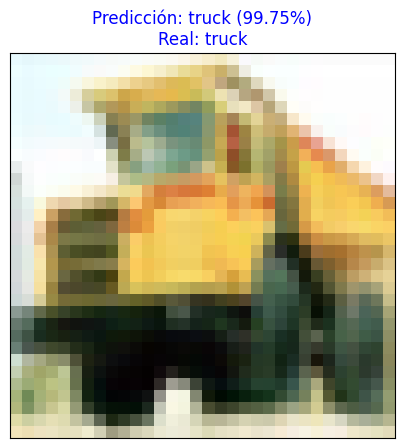

In [31]:
# Realizamos las predicciones sobre el conjunto de test
prediccion_categories = model.predict(imatges_test)

# analizamos una imagen especifica
n = 400
print(f"probabilidades de la imagen {n}: {prediccion_categories[n]}")

# usamos np.argmax para encontrar el indice de probabilidad mas alta
indice_predicho =np.argmax(prediccion_categories[n])
print(f"El modelo predice que es un/a: {class_name[indice_predicho]}")

#comprobamos con la etiqueta real
indice_real = etiquetes_test[n][0]
print(f"La categoria real es: {class_name[indice_real]}")

# Grafico de prediccion
plt.figure(figsize=(5,5))
plt.imshow(imatges_test[n]) # Mostramos la imagen original a color [5]
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Determinamos el color del título: azul si acertó, rojo si falló
color_titulo = 'blue' if indice_predicho == indice_real else 'red'

plt.title(f"Predicción: {class_name[indice_predicho]} ({100*np.max(prediccion_categories[n]):.2f}%)\nReal: {class_name[indice_real]}",
          color=color_titulo)
plt.show()

## Probamos el modelo con el dataset de test

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6870 - loss: 0.9057

Resultados finales en el conjunto de prueba:
Pérdida final en el conjunto de prueba (Test Loss): 0.9151
Precisión final en el conjunto de prueba (Test Accuracy): 0.6837


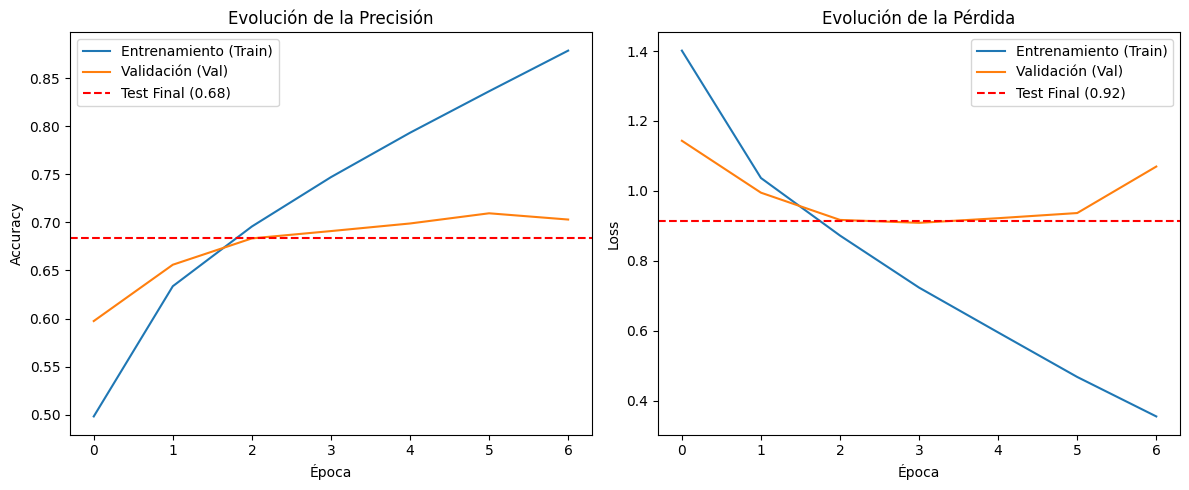

In [32]:
# Evaluamos el rendimiento global del modelo con el dataset de test
test_loss, test_accuracy = model.evaluate(imatges_test, etiquetes_test)

# Imprimimos los resultados
print(f"\nResultados finales en el conjunto de prueba:")
print(f"Pérdida final en el conjunto de prueba (Test Loss): {test_loss:.4f}")
print(f"Precisión final en el conjunto de prueba (Test Accuracy): {test_accuracy:.4f}")

# Agregamos el gráfico de rendimiento comparativo [6, 7]
plt.figure(figsize=(12, 5))

# Subtrama para la Precisión (Accuracy)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento (Train)')
plt.plot(history.history['val_accuracy'], label='Validación (Val)')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label=f'Test Final ({test_accuracy:.2f})')
plt.title('Evolución de la Precisión')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()

# Subtrama para la Pérdida (Loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento (Train)')
plt.plot(history.history['val_loss'], label='Validación (Val)')
plt.axhline(y=test_loss, color='r', linestyle='--', label=f'Test Final ({test_loss:.2f})')
plt.title('Evolución de la Pérdida')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

---

## Análisis de los resultados

- ### Analizar y valorar los resultados de `history`

Al observar el comportamiento de las métricas durante las 8 épocas ejecutadas, se pueden extraer las siguientes conclusiones técnicas:

* **Intervención del EarlyStopping:** Aunque el entrenamiento se configuró para 100 épocas, el callback de EarlyStopping detuvo el proceso en la época 8. Esto ocurrió porque la pérdida de validación (val_loss) no mejoró durante 3 épocas consecutivas tras alcanzar su punto óptimo en la época 5 (0.9119). Gracias al parámetro restore_best_weights=True, el modelo final conserva los pesos de dicha época, asegurando la mejor versión posible para la generalización.

* **Evolución del Aprendizaje:** La precisión de entrenamiento (accuracy) aumentó de manera constante hasta un 91.35%, mientras que la pérdida disminuyó a 0.2583. Esto indica que la red neuronal logró aprender e identificar patrones complejos dentro del dataset de entrenamiento de forma muy efectiva.

* **Evidencia de Overfitting:** Existe una brecha significativa entre la precisión de entrenamiento (91.35%) y la de validación (69.57% en su punto máximo). El hecho de que la val_loss comenzara a subir después de la quinta época, mientras que la pérdida de entrenamiento seguía bajando, es un síntoma claro de sobreajuste (overfitting). El modelo empezó a "memorizar" el ruido de las imágenes de entrenamiento en lugar de aprender características generales, lo que justifica la detención automática del proceso.


- ### Valoración personal los resultados optenidos.

Desde una perspectiva personal, considero que los resultados obtenidos son satisfactorios y demuestran la potencia de las Redes Neuronales de Convolución (CNN).

En primer lugar, la elección de una arquitectura CNN fue fundamental debido a la naturaleza del dataset CIFAR-10. A diferencia de datasets más simples como Fashion MNIST (que son en escala de grises), CIFAR-10 trabaja con imágenes a color (3 canales RGB) y una mayor variedad de objetos. El uso de capas Conv2D y MaxPooling2D permitió realizar una extracción de características eficiente, identificando siluetas y formas abstractas que una red densa convencional no habría detectado con tanta precisión.

Por otro lado, valoro la importancia de implementar herramientas de control como el EarlyStopping. Sin este callback, el modelo habría continuado entrenando innecesariamente, degradando su capacidad de clasificar imágenes nuevas al volverse demasiado específico para el grupo de entrenamiento. Aunque la precisión final en el dataset de test es menor que la de entrenamiento, esto es un fenómeno lógico en machine learning, ya que el modelo se enfrenta a datos que nunca ha visto antes.

Como conclusión, este ejercicio me ha permitido entender cómo los hiperparámetros y la estructura de las capas afectan la capacidad de generalización de un modelo de visión artificial. Para futuros trabajos, se podría intentar mejorar estos resultados mediante técnicas de aumentación de datos o ajustando la profundidad de la red, pero para los objetivos de esta práctica, el modelo ha demostrado ser capaz de tomar decisiones automáticas basadas en patrones visuales complejos